## Visualize where "model" patches fall among the 80k patch data set
This notebook is an adaption of `visualize_patches.ipynb` used to see which clusters my 31 patches fell among Tak's 80k. It takes in the clustering results of the 80k + 31 patches from running the bash script in `ruby_job.bash`

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#load in the result of running the bash script with Tak's clusters and my 31 patches
label = np.load("/home/rubywerman/scratch-midway2/output_mix_clustering/aggl_p-80_nc-20_m01_b28_29_31_train_patches_labels_2000-2018_random_aggl.npy")

In [4]:
num_clusters = 20

In [5]:
#gather the patch data for the 80k patches
label_dict = {}
for i in label[31:]:
    label_dict[i] = label_dict.get(i, 0) + 1

In [6]:
#gather the patch data for Ruby's 31 patches
rubys_label_dict = {}
for i in label[:31]:
    rubys_label_dict[i] = rubys_label_dict.get(i, 0) + 1
    
for i in range(num_clusters):
    if i not in rubys_label_dict.keys():
        rubys_label_dict[i] = 0

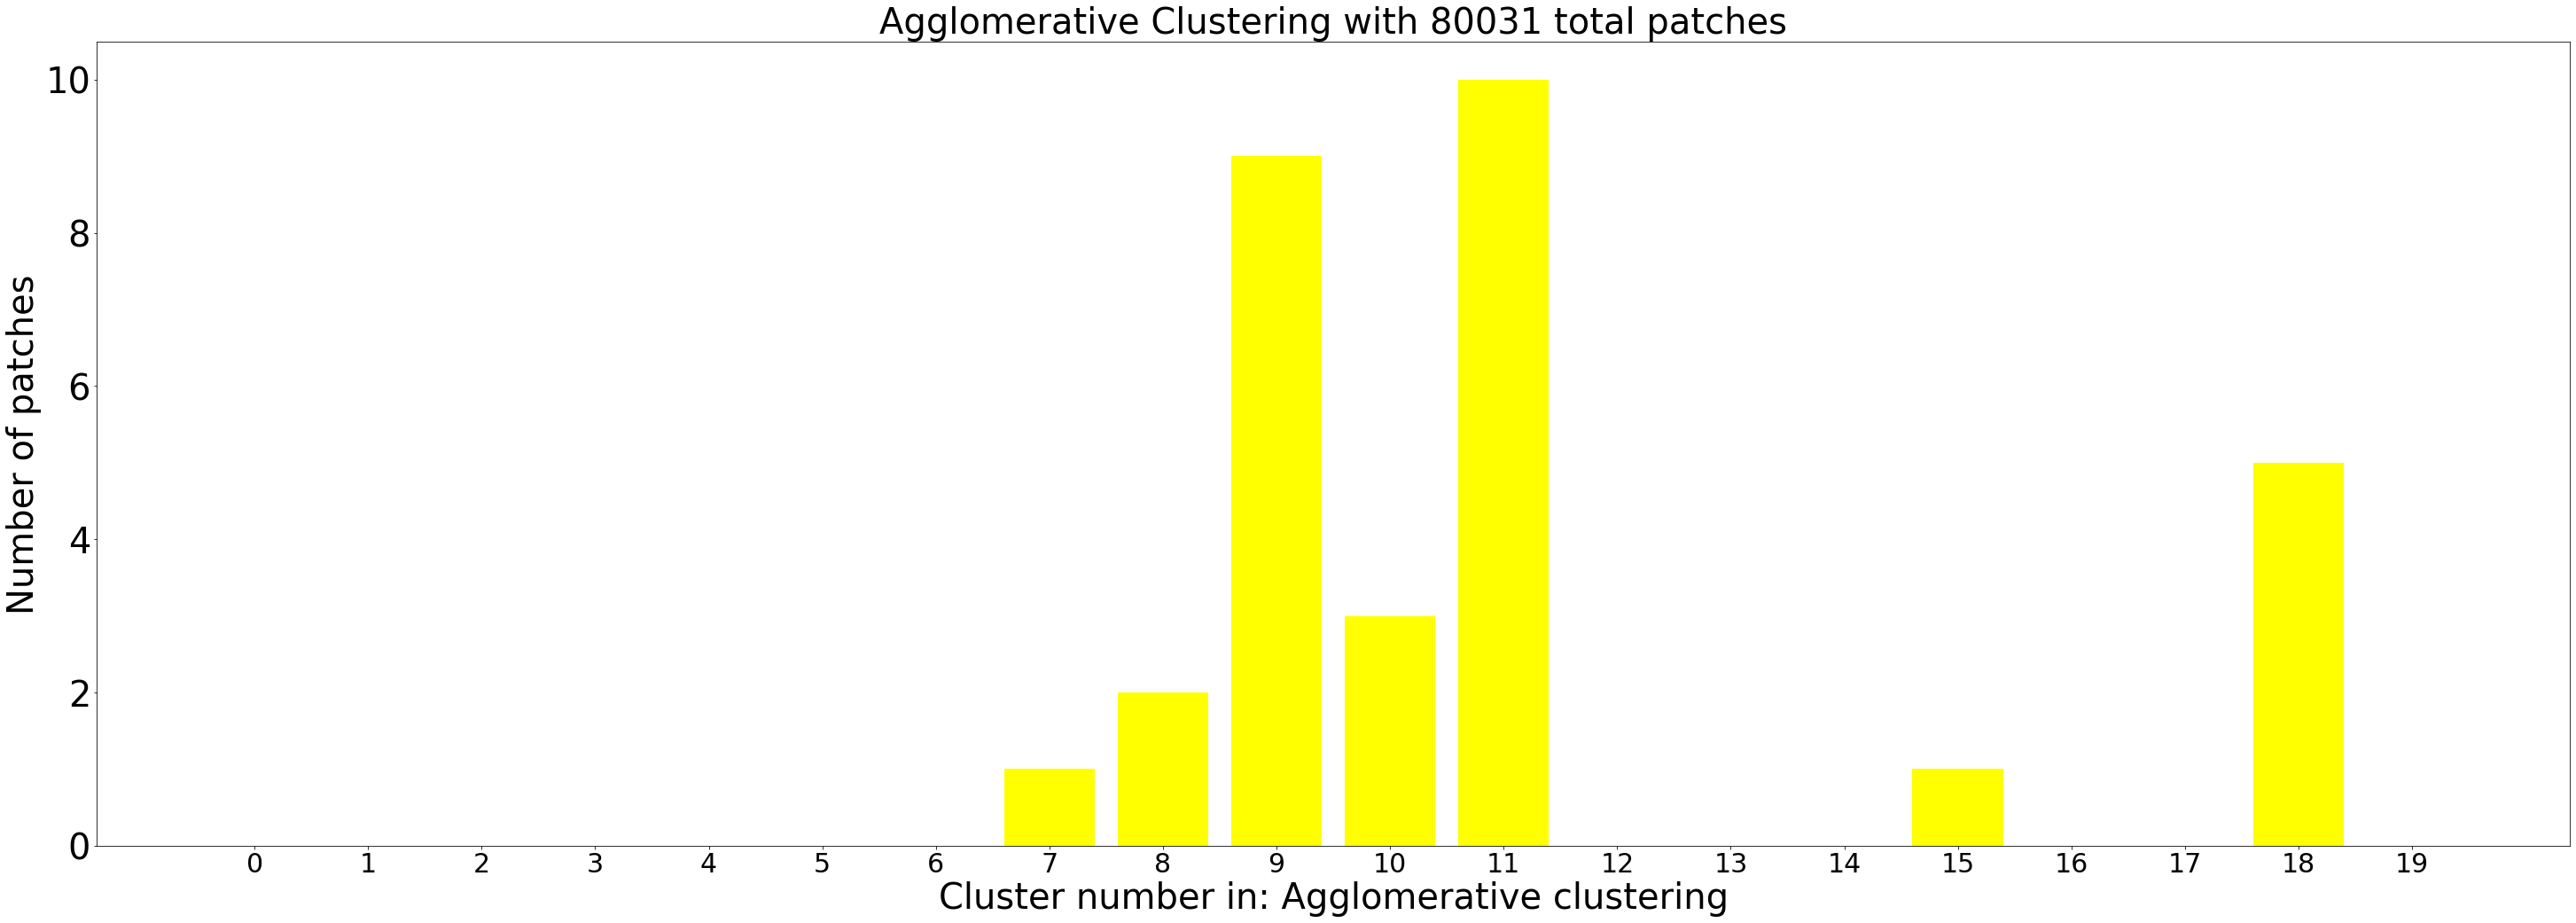

In [7]:
#create lists of the patch data for bar graph
sorted_a = []
sorted_b = []
for i in range(num_clusters):
    sorted_a.append(label_dict[i])
    sorted_b.append(rubys_label_dict[i])
    
#create stacked bar graph 
from matplotlib import rc

plt.figure(figsize=(50,20))

# Heights of bars

bars = [sorted_a, sorted_b]

# The position of the bars on the x-axis
r = range(num_clusters)

# Label for each bar and bar width
x_labels = [str(i) for i in r]
barWidth = .8

#create bars
#plt.bar(r, sorted_a, color='green', width=barWidth)
plt.bar(r, sorted_b, color='yellow', width=barWidth)
#plt.bar(r, sorted_b, bottom=sorted_a, color='yellow', width=barWidth)


# label/title graph
plt.xticks(r, x_labels, fontsize=30)
plt.yticks(fontsize=40)
plt.ylabel("Number of patches", fontsize=40)
plt.xlabel("Cluster number in: "+ "Agglomerative clustering" , fontsize=40)
#plt.legend(loc="upper right")
#plt.legend(('Tak\'s','Ruby\'s'), fontsize=40)
plt.title("Agglomerative Clustering with %d total patches"%(len(label)), fontsize=40)
plt.gcf().subplots_adjust(bottom=0.25)
    
#save image
#plt.savefig(to_save + '%d_cluster_plot.png'%(num_clusters))

# Show graphic
plt.show()

In [8]:
rubys_label_dict

{9: 9,
 8: 2,
 18: 5,
 11: 10,
 15: 1,
 7: 1,
 10: 3,
 0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 12: 0,
 13: 0,
 14: 0,
 16: 0,
 17: 0,
 19: 0}

In [9]:
df = pd.DataFrame(rubys_label_dict.keys(), columns=["Cluster"])
df["# of model patches"] = rubys_label_dict.values()
df["# of patches from the 80k"] = label_dict.values()
df["total # of patches"] = df["# of model patches"] + df['# of patches from the 80k']

In [10]:
df.sort_values(by=['# of model patches'], ascending=False)

,Cluster,# of model patches,# of patches from the 80k,total # of patches
3,11,10,5939,5949
0,9,9,3852,3861
2,18,5,4712,4717
6,10,3,4359,4362
1,8,2,5329,5331
4,15,1,7221,7222
5,7,1,8122,8123
13,6,0,3113,3113
18,17,0,2242,2242
17,16,0,1373,1373


In [11]:
df.sort_values(by=['total # of patches'], ascending=False)

,Cluster,# of model patches,# of patches from the 80k,total # of patches
5,7,1,8122,8123
4,15,1,7221,7222
3,11,10,5939,5949
1,8,2,5329,5331
7,0,0,5158,5158
10,3,0,4755,4755
2,18,5,4712,4717
15,13,0,4601,4601
6,10,3,4359,4362
14,12,0,3980,3980
